# A descriptive analysis of the airports dataframe.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [2]:
data=pd.read_csv('airports.csv')
data.head() ## visualisation initiale de la table


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [3]:
data['continent']=data['continent'].fillna('NoA') # NA for north america is a little bit confusing so we will fill it with NoA
data=data[data['continent']!='AN'] # we will remove AN because it has few airports an habitation is not very important
a=data.groupby('continent').size().sort_values(ascending=True).index # we will get the continents with the most airports
data=data[data['continent'].isin(a)] # we will keep only the continents with the most airports

## DATA CLEANING

In [4]:
data.drop(['wikipedia_link','home_link'],axis=1,inplace=True) ## drop useless columns
data.set_index('ident',inplace=True) ## set index to ident
data.rename(columns={'elevation_ft':'elevation_m'},inplace=True) #change attribut name
data['elevation_m']=data['elevation_m']/3.2808 ## convert to meters
data=data[data['type']!='closed'] # drop closed airports

data.head()

,id,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,keywords
ident,,,,,,,,,,,,,,,
00A,6523,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NoA,US,US-PA,Bensalem,no,00A,NaN,00A,NaN
00AA,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NoA,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN
00AK,6524,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NoA,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN
00AL,6525,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NoA,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN
00AS,322127,small_airport,Fulton Airport,34.942803,-97.818019,335.284077,NoA,US,US-OK,Alex,no,00AS,NaN,00AS,NaN


In [5]:
print("index is unique ") if data.index.is_unique else print("index is not  (duplicated index )");
number_per_country=data['iso_country'].value_counts()
print(number_per_country)

index is unique 
US    23051
BR     5772
JP     2211
CA     2177
AU     2020
      ...  
BM        1
JE        1
SM        1
BL        1
VA        1
Name: iso_country, Length: 242, dtype: int64


In [6]:
# as the united states has too many airports, we will separate it in US_airports
US_airports=data[data['iso_country']=='US']
data=data[data['iso_country']!='US']
US_airports.head()

,id,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,keywords
ident,,,,,,,,,,,,,,,
00A,6523,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NoA,US,US-PA,Bensalem,no,00A,NaN,00A,NaN
00AA,323361,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NoA,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN
00AK,6524,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NoA,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN
00AL,6525,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NoA,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN
00AS,322127,small_airport,Fulton Airport,34.942803,-97.818019,335.284077,NoA,US,US-OK,Alex,no,00AS,NaN,00AS,NaN


Text(0.5, 1.0, 'Number of airports per continent')

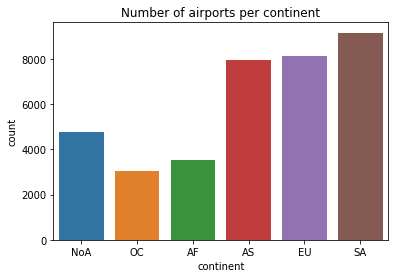

In [7]:
sns.countplot(x='continent',data=data).set_title('Number of airports per continent')


## US airports

Text(0.5, 1.0, 'Number of airports per region in the USA')

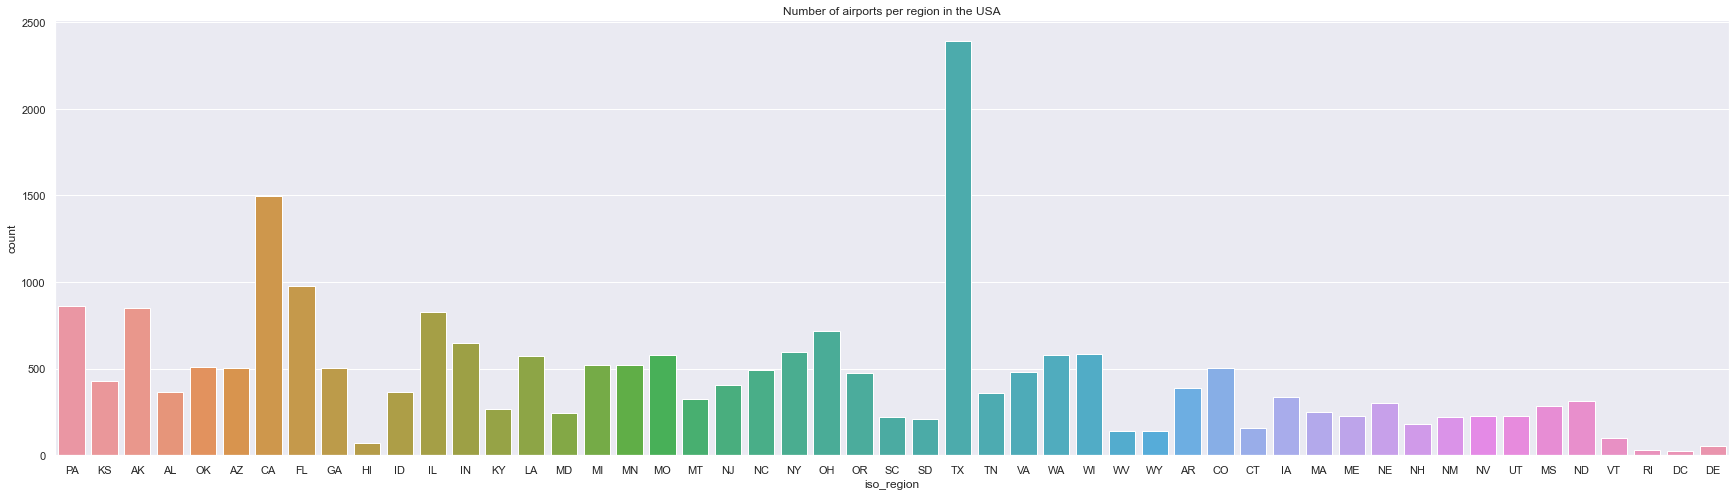

In [8]:
## plot the number of airports per region in the US
US_airports.loc[:,"iso_region"]=US_airports.loc[:,"iso_region"].replace({'US-':''}, regex=True)
## set figure size
sns.set(rc={'figure.figsize':(30,8)})
## seaborn title 
sns.countplot(x='iso_region',data=US_airports).set_title('Number of airports per region in the USA')



<ipython-input-9-6ab3c77168c6>:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(1,3,1.5)


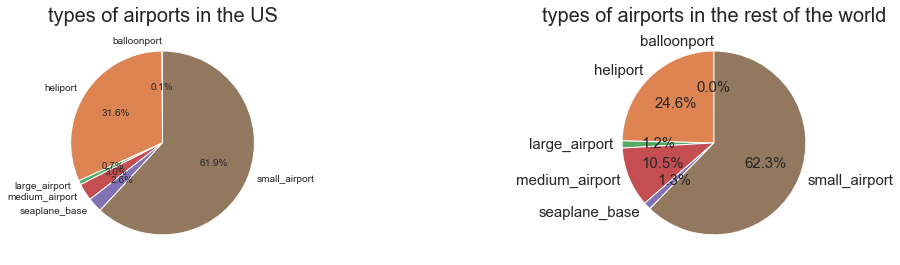

<Figure size 1800x1152 with 0 Axes>

In the US there is:
 balloonport          29
large_airport       167
seaplane_base       597
medium_airport      702
heliport           7292
small_airport     14264
Name: type, dtype: int64

while there is in the rest of the world :
 balloonport           8
large_airport       454
seaplane_base       479
medium_airport     3844
heliport           9012
small_airport     22790
Name: type, dtype: int64


In [9]:
# subplot of the number of airports per type
counts = data['type'].value_counts().sort_index()
labels =[counts.index[i] for i in range(len(counts))]
sizes = [counts.values[i] for i in range(len(counts))]

counts_US = US_airports['type'].value_counts().sort_index()
labels_US =[counts_US.index[i] for i in range(len(counts))]
sizes_US = [counts_US.values[i] for i in range(len(counts))]


plt.figure(figsize=(14,8))

plt.subplot(1,3,1.5)
plt.pie(sizes_US,labels=labels_US,autopct='%1.1f%%',startangle=90,textprops={'fontsize':10})
plt.title('types of airports in the US',fontsize=20)

plt.subplot(1,3,3)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})
plt.title('types of airports in the rest of the world',fontsize=20)
plt.figure(figsize=(25,16))

plt.show()
print("In the US there is:\n",counts_US.sort_values())
print("\nwhile there is in the rest of the world :\n",counts.sort_values())



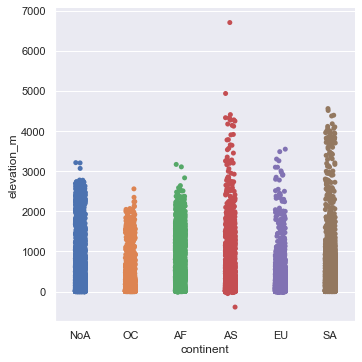

In [10]:
sns.set_theme(style="darkgrid",color_codes=True)
sns.catplot(x='continent', y='elevation_m',data=data)